# 5.3.2 Leave-One-Out Cross-Validation

In [1]:
library(ISLR2)

Using the `glm()` function to fit a model without passing in the `family` argument, then it perform linear regression just like the `lm()` function.

In [2]:
glm.fit <- glm(mpg ~ horsepower, data = Auto)
coef(glm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [3]:
lm.fit <- lm(mpg ~ horsepower, data = Auto)
coef(lm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

We can use the `glm()` function to perform linear regression and use it with the `cv.glm()` function. The `cv.glm()` function is part of the `boot` library.

In [4]:
library(boot)

In [5]:
glm.fit <- glm(mpg ~ horsepower, data = Auto)
cv.err <- cv.glm(Auto, glm.fit)
cv.err$delta

[1] 24.23151 24.23114

The two numbers in the `delta` vector of the output from the `cv.glm()` function contain the cross-validation estimate for the test error.
\begin{align}\tag{5.1}
\text{CV}_{(n)} = \frac{1}{n} \sum^n_{i=1} \text{MSE}_i
\end{align}

We can repeat this procedure for increasingly complex polynomial fits using the `for()` function.

In [6]:
cv.error <- rep(0, 10)
for (i in 1:10) {
    glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
    cv.error[i] <- cv.glm(Auto, glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321 18.97864 18.83305 18.96115
 [9] 19.06863 19.49093

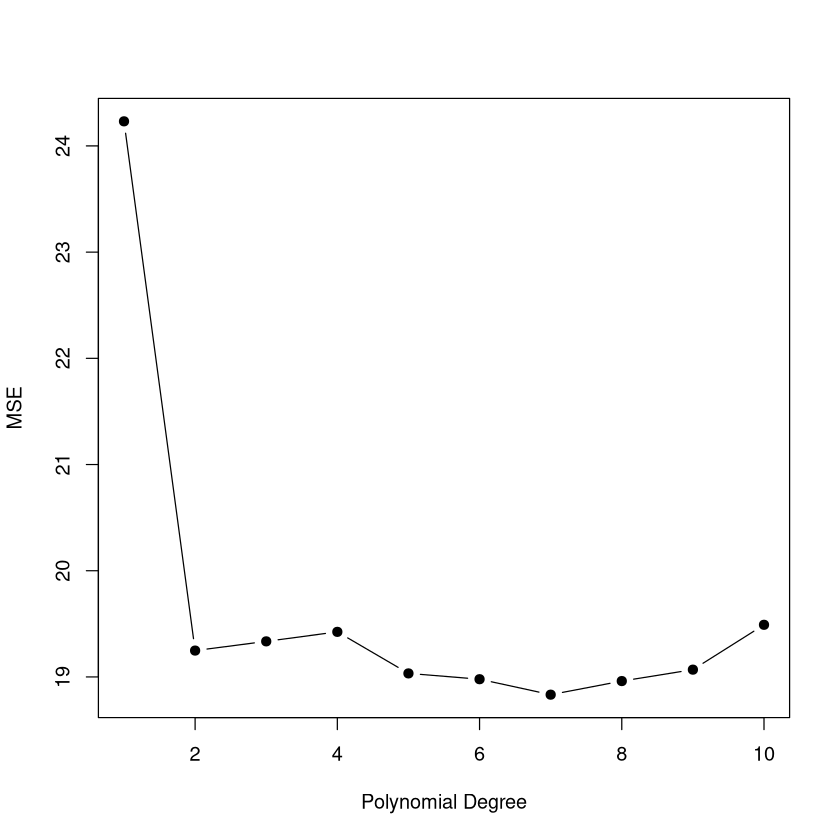

In [7]:
plot(cv.error, xlab = "Polynomial Degree", ylab = "MSE", pch = 19, type = "b")